# Importance of Excel-type Reports in Data Wrangling

Excel-type reports play a crucial role in **data wrangling** due to their accessibility and user-friendly interface, which allows non-technical users to analyze and interpret data. These reports enable the **visualization** and **organization** of raw data into structured formats, making it easier to identify patterns, outliers, and trends. Moreover, Excel provides essential features like **pivot tables**, **charts**, and **filters**, which facilitate the exploration and summarization of large datasets. These capabilities are essential in the early stages of data wrangling, as they help clean and transform data for further analysis, ultimately leading to more accurate and insightful decision-making.


## Step 1: Load and Understand the data

Lets load the data from 'input.xlsx' file and examine it.

This is a pretty basic data about Animal rescue teams receiving the rescue calls over the years from different sources and the corresponding actions they took. Lets import the required libraries and import the data.

In [1]:
#! pip install numpy
#! pip install pandas
! pip install openpyxl
#! pip install matplotlib
#! pip install seaborn
#! pip install pprint


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)


In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Our objects are to collect the data for:

* Animals sent to Rehab and Care Center over time
* Animal Species reported over time
* Source of information efficiency over time

## Step 1 : Import the data

We will read the data from the input.xlsx file

In [5]:
input_file_path = 'input.xlsx'
output_file_path = 'output.xlsx'

In [6]:
df = pd.read_excel(input_file_path, sheet_name='Importable Table')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Initial_Call_Time  2609 non-null   object 
 1   Animal_Species     2609 non-null   object 
 2   No_Of_Animals      2605 non-null   float64
 3   Final_Action       2609 non-null   object 
 4   Call_Source        2609 non-null   object 
dtypes: float64(1), object(4)
memory usage: 102.0+ KB


## Step 2 :  Solving each question

We will collect the data for each question in a particual format and then export each of the output as a new sheets of the "output.xlsx" file

In [7]:
# Change Datatype of DateTime column from object to DateTime
df['Initial_Call_Time'] = pd.to_datetime(df['Initial_Call_Time'])

# Drop null rows and Change Animals_Count colum from float to Int32
df.dropna(inplace=True)
df['No_Of_Animals'] = df['No_Of_Animals'].astype(dtype='int32')

df.info()

C:\Users\smkamran\AppData\Local\Temp\ipykernel_17592\2880141405.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Initial_Call_Time'] = pd.to_datetime(df['Initial_Call_Time'])


<class 'pandas.core.frame.DataFrame'>
Index: 2605 entries, 0 to 2608
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Initial_Call_Time  2605 non-null   datetime64[ns]
 1   Animal_Species     2605 non-null   object        
 2   No_Of_Animals      2605 non-null   int32         
 3   Final_Action       2605 non-null   object        
 4   Call_Source        2605 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 111.9+ KB


In [8]:
df.head(15).style.background_gradient(cmap='Greens', axis=0, subset=['No_Of_Animals']).set_caption("Rangers Response Over Time")

,Initial_Call_Time,Animal_Species,No_Of_Animals,Final_Action,Call_Source
0,2021-06-23 16:45:00,Birds,6,ACC,Other
1,2021-06-24 10:00:00,Birds,4,Rehabilitator,Central
2,2021-06-23 14:30:00,Deer,0,Unfounded,Employee
3,2021-06-23 13:00:00,Small Mammals-RVS,0,Unfounded,Employee
4,2021-06-23 09:20:00,Small Mammals-non RVS,1,ACC,Central
5,2021-06-23 09:00:00,Domestic Birds,1,ACC,Employee
6,2021-06-23 05:30:00,Birds,0,Unfounded,Employee
7,2021-06-22 15:00:00,Domesticated Animals,0,Unfounded,Public
8,2021-06-22 15:30:00,Domesticated Animals,1,ACC,Employee
9,2021-06-22 11:30:00,Domesticated Animals,0,Unfounded,Central


In [9]:
# What are the values by Species
df.groupby('Animal_Species').count().sort_values(by='Animal_Species').head()

,Initial_Call_Time,No_Of_Animals,Final_Action,Call_Source
Animal_Species,,,,
Birds,843,843,843,843
Coyotes,18,18,18,18
Deer,71,71,71,71
Domestic Birds,70,70,70,70
Domestic Small Mammals-RVS,1,1,1,1


In [10]:
df.groupby('Initial_Call_Time').count().sort_values(by='Animal_Species', ascending=False).head()

,Animal_Species,No_Of_Animals,Final_Action,Call_Source
Initial_Call_Time,,,,
2018-12-04 09:30:00,5,5,5,5
2018-08-21 08:00:00,5,5,5,5
2018-08-09 08:30:00,5,5,5,5
2018-08-16 08:00:00,4,4,4,4
2020-11-23 11:20:00,4,4,4,4


In [11]:
df.groupby('Final_Action').count().sort_values(by='Animal_Species', ascending=False).head()

,Initial_Call_Time,Animal_Species,No_Of_Animals,Call_Source
Final_Action,,,,
ACC,775,775,775,775
Unfounded,588,588,588,588
Relocated/Condition Corrected,470,470,470,470
Monitored Animal,313,313,313,313
Rehabilitator,282,282,282,282


In [12]:
df.groupby('Call_Source').count().sort_values(by='Animal_Species', ascending=False)

,Initial_Call_Time,Animal_Species,No_Of_Animals,Final_Action
Call_Source,,,,
Employee,821,821,821,821
Public,582,582,582,582
Central,538,538,538,538
"Conservancies/""Friends of"" Groups",402,402,402,402
Observed by Ranger,157,157,157,157
Other,105,105,105,105


In the DateTime field since we have both Date and Time, hence grouping based on this column /
will not be that effective, hence we need another column only for year on which we will gorup.

In [13]:
# Add a new Column for Date (Year) only, since grouping on 
# Full DateTime is not effectively show trends over time
df = df.sort_values(by='Initial_Call_Time').reset_index(drop=True)
df['Year'] = df['Initial_Call_Time'].dt.strftime('%Y')
df.head(15).style.background_gradient(cmap='plasma', axis=0, subset=['No_Of_Animals', 'Year']).set_caption("Rangers Response Over Time")

,Initial_Call_Time,Animal_Species,No_Of_Animals,Final_Action,Call_Source,Year
0,2018-05-02 09:30:00,Small Mammals-RVS,0,Unfounded,Public,2018
1,2018-05-07 13:30:00,Raptors,1,Submitted for DEC Testing,Employee,2018
2,2018-05-16 09:00:00,Small Mammals-RVS,2,ACC,Employee,2018
3,2018-06-01 12:00:00,Small Mammals-RVS,1,ACC,Employee,2018
4,2018-06-05 00:00:00,Small Mammals-RVS,1,Relocated/Condition Corrected,Central,2018
5,2018-06-11 10:15:00,Raptors,1,Rehabilitator,Public,2018
6,2018-06-12 08:30:00,Raptors,1,Monitored Animal,Public,2018
7,2018-06-12 08:30:00,Raptors,2,Monitored Animal,Public,2018
8,2018-06-12 14:00:00,Small Mammals-RVS,1,ACC,"Conservancies/""Friends of"" Groups",2018
9,2018-06-12 17:10:00,Raptors,1,Rehabilitator,Public,2018


In [14]:
# Check for unique values under Species
df['Animal_Species'].unique()

array(['Small Mammals-RVS', 'Raptors', 'Birds', 'Small Mammals-non RVS',
       'Domesticated Animals', 'Terrestrial Reptile or Amphibian',
       'Domestic Birds', 'Deer', 'Domestic Small Mammals-non RVS',
       'Fish-numerous quantity, Terrestrial Reptile or Amphibian',
       'Coyotes', 'Marine Mammals-seals only',
       'Domestic Small Mammals-RVS', 'Marine Mammals-whales, Dolphin',
       'Marine Reptiles', 'Non Native Fish-(invasive)',
       'Rare, Endangered, Dangerous'], dtype=object)

In [15]:
# Check for unique values under Final_Actions
df['Final_Action'].unique()

array(['Unfounded', 'Submitted for DEC Testing', 'ACC',
       'Relocated/Condition Corrected', 'Rehabilitator',
       'Monitored Animal', 'Advised/Educated others'], dtype=object)

### Visualize the data

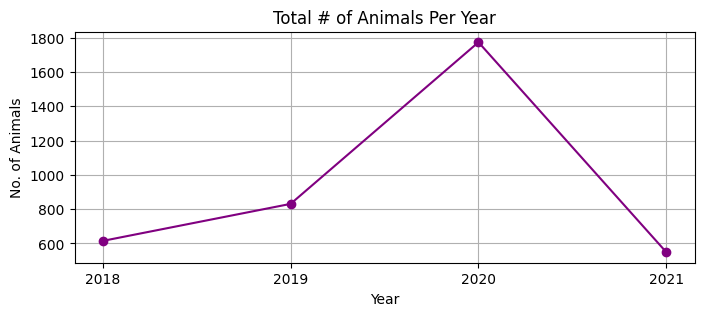

In [16]:
# Count the Animals using Call Year
year_count_df = df.groupby(['Year'])['No_Of_Animals'].sum().reset_index()

# Plot a lineplot for the counts over the year data
plt.figure(figsize=(8,3))
plt.plot(year_count_df['Year'], year_count_df['No_Of_Animals'], marker='o',
         linestyle='-', color='purple')
plt.title('Total # of Animals Per Year')
plt.xlabel('Year')
plt.ylabel('No. of Animals')
plt.grid(True)
plt.show()

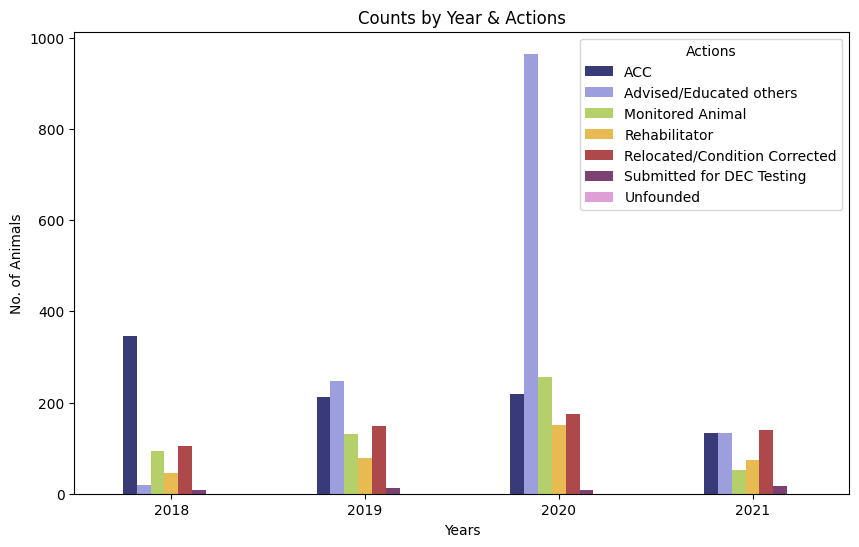

In [17]:
# Legend will show Unfounded but no entries as here the # of Animals are 0
year_action_count_df = df.groupby(['Year', 'Final_Action'])['No_Of_Animals'].sum().reset_index()

# Stacked bar plot of Year, Action over the time period
pivoted_counts = year_action_count_df.pivot(index='Year', columns='Final_Action', values='No_Of_Animals')

# show better colors
pivoted_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='tab20b')
plt.title('Counts by Year & Actions')
plt.xlabel('Years')
plt.ylabel('No. of Animals')
plt.legend(title='Actions')
plt.xticks(rotation=0)
plt.show()

## Animals sent to Rehab and Care Center over time

In [18]:
# Filter by Final Action is in "Rehabilitator" or ACC
reh_acc_df = df[df['Final_Action'].isin(['Rehabilitator', 'ACC'])]
reh_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 2 to 2604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Initial_Call_Time  1057 non-null   datetime64[ns]
 1   Animal_Species     1057 non-null   object        
 2   No_Of_Animals      1057 non-null   int32         
 3   Final_Action       1057 non-null   object        
 4   Call_Source        1057 non-null   object        
 5   Year               1057 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 53.7+ KB


In [19]:
action_year_count_df = reh_acc_df.groupby(['Final_Action', 'Year'])['No_Of_Animals'].sum().reset_index()
action_year_count_df

,Final_Action,Year,No_Of_Animals
0,ACC,2018,345
1,ACC,2019,212
2,ACC,2020,219
3,ACC,2021,133
4,Rehabilitator,2018,45
5,Rehabilitator,2019,78
6,Rehabilitator,2020,151
7,Rehabilitator,2021,75


In [20]:
df_pivoted = action_year_count_df.pivot(index='Final_Action', 
                                        columns='Year', 
                                        values='No_Of_Animals'
                                       )

df_pivoted

Year,2018,2019,2020,2021
Final_Action,,,,
ACC,345,212,219,133
Rehabilitator,45,78,151,75


#### In the following sections, we have used openpyxl library to construct a report in Excel. Below is the reference material for openpyxl for your curious self.

* [openpyxl Tutorial](https://openpyxl.readthedocs.io/en/stable/tutorial.html)
* [openpyxl Documentation](https://openpyxl.readthedocs.io/en/stable/api/openpyxl.utils.html)
* [Short Youtube video to get you started](https://youtu.be/718edSNvKLA?si=ZTCSPvKVWNQv69U0)

In [21]:
from openpyxl import load_workbook, Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, Alignment
from openpyxl.utils import get_column_letter  # Import to get the column letter from index
from openpyxl.styles import PatternFill  # For Coloring the Cell
import gc

In [22]:
def save_to_excel(df, file_name, sheet_name, title, data_heading):
    """
    Saves a DataFrame to an Excel file, adds a title and heading with custom formatting,
    and ensures that the file handle is properly released after writing and modifying the file.

    Parameters:
        df (pd.DataFrame): The DataFrame to save to Excel.
        file_name (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to write to or create.
        title (str): The title to insert at the top of the sheet.
        data_heading (str): The main heading to insert after the title.

    Returns:
        None: Writes the DataFrame and formatting to the specified Excel file.
    """
    
    # Step 1: Open the workbook and create a new sheet if it doesn't exist yet
    try:
        work_book = load_workbook(file_name)
    except FileNotFoundError:
        work_book = Workbook()

    if sheet_name in work_book.sheetnames:
        # If sheet exists, clean 5 cols
        work_sheet = work_book[sheet_name]
        work_sheet.delete_cols(1, 5)        
    else:
        # If Sheet not exists create it
        work_sheet = work_book.create_sheet(sheet_name)

    # Step 2: Insert space for the title, blank row, and heading (Insert 3 rows)
    work_sheet.insert_rows(1, 2)  # Insert 2 rows for title, blank row, and heading

    # Step 3: Save the workbook with inserted rows (and close it to release file handle)    
    try:
        work_book.save(file_name)
        work_book.close()
    except Exception as e:
        print(f"Error saving workbook: {e}")
        work_book.close()
        return    

    # Step 4: Now write the DataFrame starting below the inserted rows (starting at row 4)
    try:
        with pd.ExcelWriter(file_name, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
            df.to_excel(writer, sheet_name=sheet_name, startrow=2, index=True)  # Write starting at row 3            
    except Exception as e:
        print(f"Error writing DataFrame to Excel: {e}")
        return  # Return if there's an error writing the DataFrame
    
    # Step 5: Reopen the workbook to modify the sheet after data is written
    try:
        work_book = load_workbook(file_name)
        work_sheet = work_book[sheet_name]

        # Define formatting styles
        blue_fill = PatternFill(start_color='00008B', end_color='00008B', fill_type="solid")
        grey_fill = PatternFill(start_color='A9A9A9', end_color='A9A9A9', fill_type="solid")  # Dark blue for title/heading
        purple_fill = PatternFill(start_color='800080', end_color='800080', fill_type="solid")  # Dark Purple for title/heading
        white_font_title = Font(color='FFFFFF', bold=True, size=16, underline='single')  # White bold font for title
        white_font_heading = Font(color='FFFFFF', bold=True, size=14, underline='single')  # White bold font for headings
        
        # Step 6: Calculate the total number of columns (index columns + data columns)
        total_columns = len(df.columns) + len(df.index.names)

        # Step 7: Add the title and merge it across the appropriate columns
        work_sheet['A1'] = title
        work_sheet['A1'].alignment = Alignment(horizontal='center')
        work_sheet['A1'].fill = blue_fill
        work_sheet['A1'].font = white_font_title  # Combine font color, size, and boldness here
        # Merge cells for the title based on the format
        work_sheet.merge_cells(start_row=1, start_column=1, end_row=1, end_column=5)
        
        # Step 8: Add the data heading
        work_sheet['B2'] = data_heading
        work_sheet['B2'].alignment = Alignment(horizontal='center')
        work_sheet['B2'].fill = purple_fill
        work_sheet['B2'].font = white_font_heading  # Set white font with size 12 for heading
        # Merge cells for the title based on the format
        work_sheet.merge_cells(start_row=2, start_column=2, end_row=2, end_column=5)

        # Step 9: Apply formatting to column headers (starting from row 3)
        for cell in work_sheet[3]:
            cell.font = Font(bold=True, color='000000', size=12)  # Apply font size, color, and bold to headers
            cell.alignment = Alignment(horizontal='center')
            cell.fill = grey_fill

        # Step 10: Adjust column widths for better readability
        for col in work_sheet.iter_cols(min_row=3):  # Adjust from the header row onwards
            max_length = 0
            column_letter = get_column_letter(col[0].column)  # Get the column letter

            for cell in col:
                try:
                    if cell.value:
                        max_length = max(max_length, len(str(cell.value)))
                except:
                    pass

            # Adjust the column width
            adjusted_width = (max_length + 2) * 1.2  # Increase width for readability
            work_sheet.column_dimensions[column_letter].width = adjusted_width

        # Step 11: Save the workbook with the new formatting and close it to release the file handle        
        work_book.save(file_name)
        work_book.close()
    except Exception as e:
        print(f"Error while modifying the Excel sheet: {e}")        
        work_book.close()
    finally:
        # Ensure workbook is closed and file handle is released
        if 'work_book' in locals():
            work_book.close()  # Exit if there's an error saving the workbook
        gc.collect() # Force garbage collection to release any lingering file handles  


In [23]:
# Save the answer to question 1 in Excel sheet of output.xlsx as required
save_to_excel(df_pivoted,
              output_file_path, 
              'Q1-Sol', 
              'Animals Sent to Rehabilitation & ACC',
              'Counts By Year'
              )
print('Data saved to excel sheet successfully')

Data saved to excel sheet successfully


## Animal Species reported over time

For question 2, we will group on Year and Animal Species

### Using Animal Class Only

In [24]:
# Exclude these entries where Animal was not found or Count <= 0
animal_year_type_df = df[(df['Final_Action'] != 'Unfounded') | (df['No_Of_Animals'] > 0)]

# Now group it at high level for Year and Species.
animal_year_type_df = df.groupby(['Year', 'Animal_Species']).size().reset_index(name='Count')

animal_year_type_df.shape

(55, 3)

In [25]:
# Pivot the table to have years as columns and species as rows (wide format)
pivoted_animal_year_type_df = animal_year_type_df.pivot(
    index=['Animal_Species'], 
    columns='Year', 
    values='Count'
)

# Fill NaN values with 0 and convert to int to avoid float type
pivoted_animal_year_type_df = pivoted_animal_year_type_df.fillna(0).astype(int)

pivoted_animal_year_type_df.head()

Year,2018,2019,2020,2021
Animal_Species,,,,
Birds,101,200,369,173
Coyotes,2,7,5,4
Deer,13,18,27,13
Domestic Birds,4,19,19,28
Domestic Small Mammals-RVS,0,1,0,0


In [26]:
save_to_excel(pivoted_animal_year_type_df, 
              output_file_path, 
              'Q2-Sol', 
              'Year-Wise Incidents By Species',
              'No of Animals by Year'
              )
print('Data saved to excel sheet successfully')

Data saved to excel sheet successfully


## Source of information efficiency over time

In [27]:
df['Call_Source'].unique()

array(['Public', 'Employee', 'Central',
       'Conservancies/"Friends of" Groups', 'Other', 'Observed by Ranger'],
      dtype=object)

In [28]:
df['Call_Source'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2605 entries, 0 to 2604
Series name: Call_Source
Non-Null Count  Dtype 
--------------  ----- 
2605 non-null   object
dtypes: object(1)
memory usage: 20.5+ KB


In [29]:
call_source_year_df = df.groupby(['Year', 'Call_Source']).size().reset_index(name='Count')

# Pivot the table to have years as columns and call sources as rows (wide format)
pivoted_call_source_df = call_source_year_df.pivot(index='Call_Source', columns='Year', values='Count')

# Fill NaN values with 0 (if needed)
pivoted_call_source_df = pivoted_call_source_df.fillna(0).astype(int)

# Display the resulting DataFrame
pivoted_call_source_df

Year,2018,2019,2020,2021
Call_Source,,,,
Central,116,125,163,134
"Conservancies/""Friends of"" Groups",258,60,55,29
Employee,180,213,281,147
Observed by Ranger,12,48,61,36
Other,35,33,29,8
Public,95,152,228,107


In [30]:
# Save the result to an Excel file
save_to_excel(pivoted_call_source_df, 
              output_file_path, 
              'Q3-Sol', 
              'Year-Wise Call Source Trends',
              'Counts By Year'
              )
print('Data saved to excel sheet successfully')



Data saved to excel sheet successfully


## Showing Images of Generated Excel Reports

In [31]:
!ls ../input/d/muhammadkamransyed/reportimages

'ls' is not recognized as an internal or external command,
operable program or batch file.


# The Outputs of Excel Files will look like something following:

Alternatively you can check the output in the output folder as well in output.xlsx file as a separate sheet

In [32]:
import matplotlib.image as mpimg

def display_image(image_path, lable="", width=10, height=10):
    plt.figure(figsize=(width, height))  # Set figure size
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks  # Turn off axis numbers
    plt.xlabel(lable)  # Add x-axis label
    plt.show()

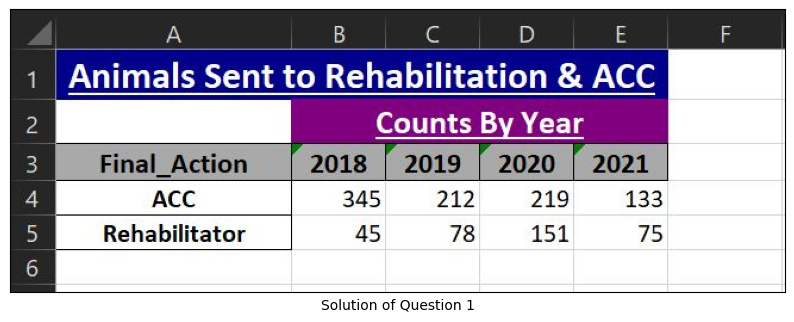

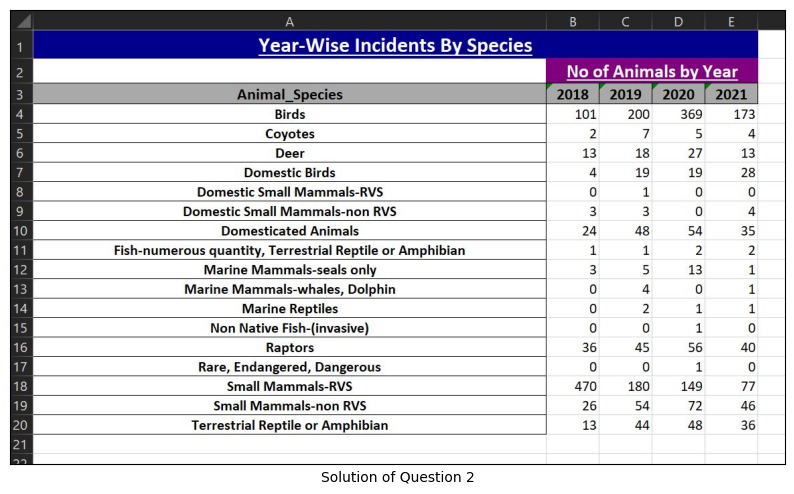

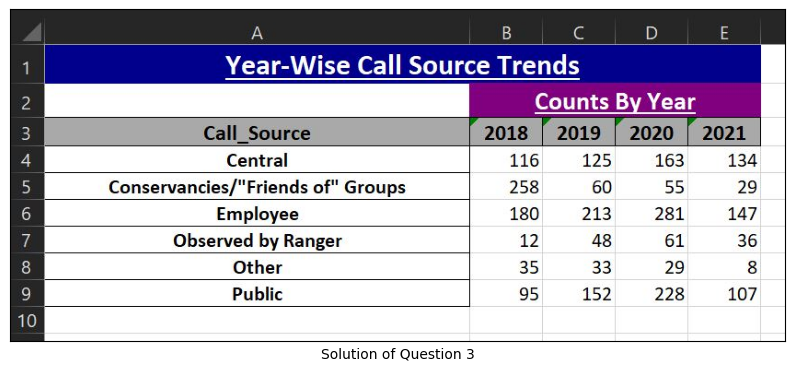

In [34]:
# Display the images
display_image('Q1_Sol.JPG',
              'Solution of Question 1')
display_image('Q2_Sol.JPG', 
              'Solution of Question 2')
display_image('Q3_Sol.JPG',
              'Solution of Question 3')